# EFIxTIE (Ion temperatures)

> Abstract: Access to the EFIxTIE data product containing estimates of the O+ ion temperature in the upper F region along Swarm orbits.
> 
> For more information about this product, see the [SITE project](https://earth.esa.int/eogateway/activities/swarm-ion-temperature-estimation).

In [1]:
SERVER_URL = 'https://vires.services/ows'

In [2]:
# Display important package versions used
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [3]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# Control the HTML display of the datasets
xr.set_options(display_expand_attrs=False, display_expand_coords=True, display_expand_data=True)

from viresclient import SwarmRequest

In [4]:
request = SwarmRequest(SERVER_URL)

## What data is available?

There are three collections available, one for each Swarm spacecraft.

In [5]:
request.available_collections("EFI_TIE", details=False)

{'EFI_TIE': ['SW_OPER_EFIATIE_2_', 'SW_OPER_EFIBTIE_2_', 'SW_OPER_EFICTIE_2_']}

In [6]:
print(request.available_measurements("EFI_TIE"))

['Latitude_GD', 'Longitude_GD', 'Height_GD', 'Radius_GC', 'Latitude_QD', 'MLT_QD', 'Tn_msis', 'Te_adj_LP', 'Ti_meas_drift', 'Ti_model_drift', 'Flag_ti_meas', 'Flag_ti_model']


Notes for the listed available variables:

In [7]:
tie_vars = [
    # Positional information in geodetic (GD) and geocentric (GC) frames
    #  redundant with VirES variables Latitude, Longitude, Radius (in geocentric frame)
    "Latitude_GD", "Longitude_GD", "Height_GD", "Radius_GC",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Neutral temperature from NRLMSISE-00 model
    "Tn_msis",
    # Corrected Swarm LP electron temperature
    "Te_adj_LP",
    # Estimated ion temperature from TII drift at high latitudes
    "Ti_meas_drift",
    # Estimated Ion temperature from Weimer 2005 model drifts at high latitudes
    "Ti_model_drift",
    # Bitwise flags with process information
    #  See the Product definition document for details
    "Flag_ti_meas", "Flag_ti_model"
]

## Fetching and plotting data

Hint: you can identify start/end times of specific orbit numbers using `.get_times_for_orbits`:

In [8]:
request = SwarmRequest(SERVER_URL)
request.get_times_for_orbits(3740, 3742, mission="Swarm", spacecraft="Alpha")

(datetime.datetime(2014, 7, 25, 1, 9, 37, 149985),
 datetime.datetime(2014, 7, 25, 5, 51, 25, 595024))

For demonstration, we will fetch some data from Swarm Alpha (`SW_OPER_EFIATIE_2_`). We also ask for magnetic local time, `MLT`, and orbital information: `OrbitNumber`, `OrbitDirection` which can be useful for some plots.

In [9]:
start = dt.datetime(2014, 7, 25, 1, 9, 38)
end = dt.datetime(2014, 7, 25, 5, 51, 25)

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_EFIATIE_2_")
request.set_products(
    measurements=tie_vars,
    auxiliaries=["OrbitNumber", "OrbitDirection", "MLT"]
)
data = request.get_between(start, end)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (4.34MB)

Data can be loaded as either a pandas datframe or a xarray dataset.

In [10]:
df = data.as_dataframe()
df.head()

Radius  OrbitDirection  Tn_msis  \
Timestamp                                                              
2014-07-25 01:09:38.196999936  6.845324e+06               1  1048.83   
2014-07-25 01:09:38.696000000  6.845318e+06               1  1048.90   
2014-07-25 01:09:39.196992256  6.845312e+06               1  1048.98   
2014-07-25 01:09:39.696000000  6.845307e+06               1  1049.05   
2014-07-25 01:09:40.196999936  6.845301e+06               1  1049.14   

                               Longitude_GD  Flag_ti_meas        MLT  \
Timestamp                                                              
2014-07-25 01:09:38.196999936   -126.081803             3  16.776039   
2014-07-25 01:09:38.696000000   -126.082416             3  16.775776   
2014-07-25 01:09:39.196992256   -126.083031             3  16.775513   
2014-07-25 01:09:39.696000000   -126.083644             3  16.775248   
2014-07-25 01:09:40.196999936   -126.084259             3  16.774982   

                               Ti_meas_drift      Height_GD     MLT_QD  \
Timestamp                                                                
2014-07-25 01:09:38.196999936        1308.57  467186.573954  16.734770   
2014-07-25 01:09:38.696000000        1308.26  467180.926784  16.734495   
2014-07-25 01:09:39.196992256        1308.20  467175.265855  16.734220   
2014-07-25 01:09:39.696000000        1308.21  467169.641168  16.733945   
2014-07-25 01:09:40.196999936        1309.25  467164.002862  16.733669   

                               Latitude  OrbitNumber  Flag_ti_model  \
Timestamp                                                             
2014-07-25 01:09:38.196999936 -0.012119         3740              3   
2014-07-25 01:09:38.696000000  0.019726         3740              3   
2014-07-25 01:09:39.196992256  0.051698         3740              3   
2014-07-25 01:09:39.696000000  0.083543         3740              3   
2014-07-25 01:09:40.196999936  0.115515         3740              3   

                               Te_adj_LP  Latitude_GD   Longitude Spacecraft  \
Timestamp                                                                      
2014-07-25 01:09:38.196999936    1486.15    -0.012195 -126.081803          A   
2014-07-25 01:09:38.696000000    1485.50     0.019850 -126.082416          A   
2014-07-25 01:09:39.196992256    1484.76     0.052023 -126.083031          A   
2014-07-25 01:09:39.696000000    1484.88     0.084067 -126.083644          A   
2014-07-25 01:09:40.196999936    1486.79     0.116240 -126.084259          A   

                               Latitude_QD  Ti_model_drift     Radius_GC  
Timestamp                                                                 
2014-07-25 01:09:38.196999936     4.363832         1308.57  6.845324e+06  
2014-07-25 01:09:38.696000000     4.395916         1308.26  6.845318e+06  
2014-07-25 01:09:39.196992256     4.428128         1308.20  6.845312e+06  
2014-07-25 01:09:39.696000000     4.460213         1308.21  6.845307e+06  
2014-07-25 01:09:40.196999936     4.492427         1309.25  6.845301e+06

In [11]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:         (Timestamp: 33808)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2014-07-25T01:09:38.196999936 ...
Data variables: (12/19)
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Radius          (Timestamp) float64 6.845e+06 6.845e+06 ... 6.845e+06
    OrbitDirection  (Timestamp) int8 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    Tn_msis         (Timestamp) float64 1.049e+03 1.049e+03 ... 1.044e+03
    Longitude_GD    (Timestamp) float64 -126.1 -126.1 -126.1 ... 163.2 163.2
    Flag_ti_meas    (Timestamp) uint8 3 3 3 3 3 3 3 3 3 3 ... 1 1 1 1 1 1 1 1 1
    ...              ...
    Te_adj_LP       (Timestamp) float64 1.486e+03 1.486e+03 ... 1.98e+03
    Latitude_GD     (Timestamp) float64 -0.01219 0.01985 ... -0.1691 -0.1371
    Longitude       (Timestamp) float64 -126.1 -126.1 -126.1 ... 163.2 163.2
    Latitude_QD     (Timestamp) float64 4.364 4.396 4.428 ... -6.095 -6.063
    Ti_model_drift  (Timestamp) float64 1.309e+03 1.308e+03 ... 1.279e+03
    Radius_GC       (Timestamp) float64 6.845e+06 6.845e+06 ... 6.845e+06
Attributes: (3)

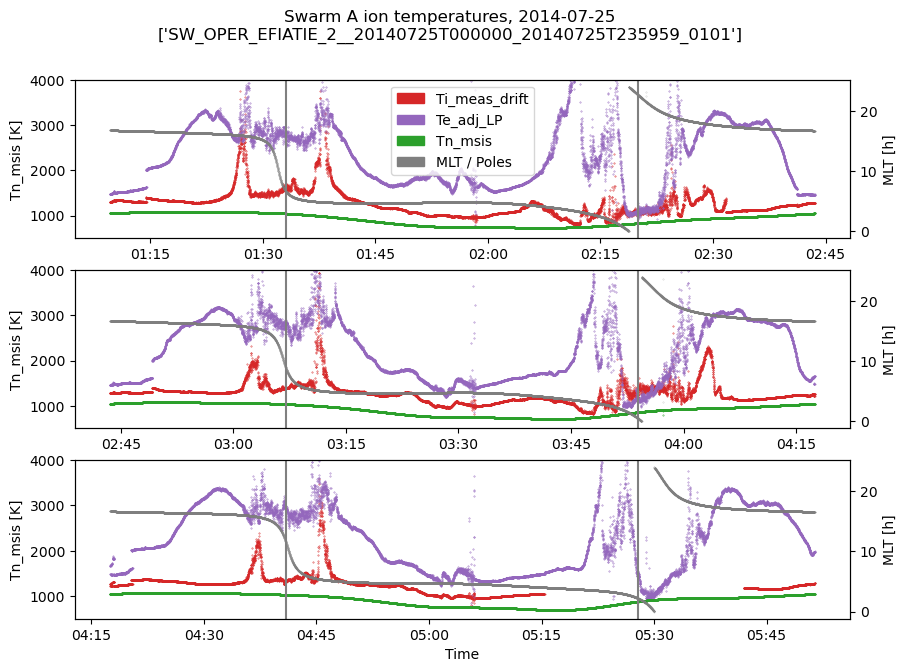

In [12]:
# Set up a time series plot where each row is an orbit
nrows = len(np.unique(ds["OrbitNumber"]))
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(10, 7))
axes_r = [ax.twinx() for ax in axes]
for i, (orbitnumber, ds_orbit) in enumerate(ds.groupby("OrbitNumber")):
    # Plot electron & ion temperatures, measured and modelled
    ds_orbit.plot.scatter(x="Timestamp", y="Ti_meas_drift", s=0.1, ax=axes[i], color="tab:red")
    ds_orbit.plot.scatter(x="Timestamp", y="Te_adj_LP", s=0.1, ax=axes[i], color="tab:purple")
    ds_orbit.plot.scatter(x="Timestamp", y="Tn_msis", s=0.1, ax=axes[i], color="tab:green")
    ds_orbit.plot.scatter(x="Timestamp", y="MLT", s=0.05, ax=axes_r[i], color="tab:gray", alpha=0.5)
    # Identify times closest to North and South pole
    t_NP = ds_orbit["Timestamp"].isel(Timestamp=ds_orbit["Latitude"].argmax()).values
    t_SP = ds_orbit["Timestamp"].isel(Timestamp=ds_orbit["Latitude"].argmin()).values
    axes[i].axvline(mpl.dates.date2num(t_NP), color="gray")
    axes[i].axvline(mpl.dates.date2num(t_SP), color="gray")
    # Tidy up labelling
    axes[i].xaxis.set_major_formatter(mpl.dates.DateFormatter("%H:%M"))
    axes[i].set_xlabel("")
# Add legend manually
red = mpl.patches.Patch(color="tab:red", label="Ti_meas_drift")
purple = mpl.patches.Patch(color="tab:purple", label="Te_adj_LP")
green = mpl.patches.Patch(color="tab:green", label="Tn_msis")
gray = mpl.patches.Patch(color="tab:gray", label="MLT / Poles")
axes[0].legend(handles=[red, purple, green, gray])
# Tidy up axes and labelling
for ax in axes:
    ax.set_ylim(500, 4000)
axes[-1].set_xlabel("Time")
title = "".join([
    f"Swarm {ds['Spacecraft'].data[0]} ion temperatures, ",
    ds["Timestamp"].dt.date.data[0].isoformat(),
    f"\n{[s for s in ds.attrs['Sources'] if 'TIE' in s]}"
])
fig.suptitle(title);